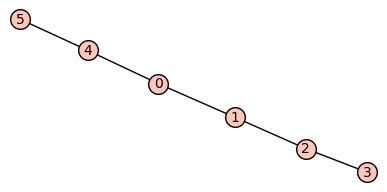

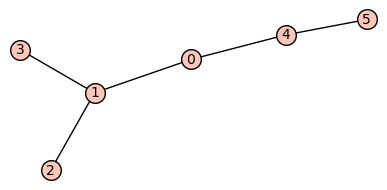

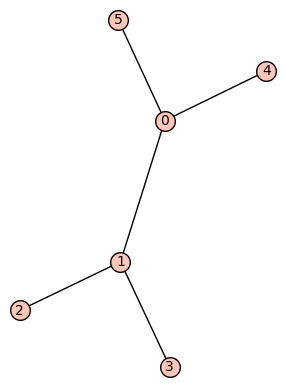

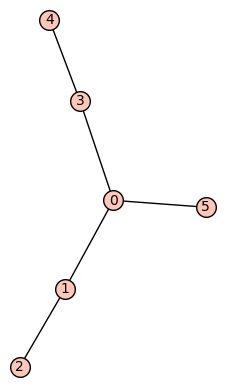

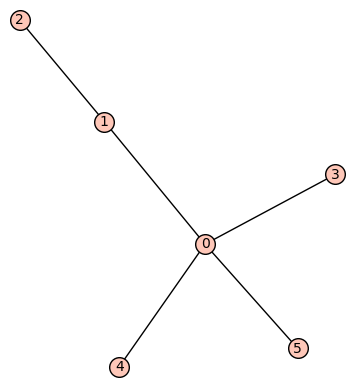

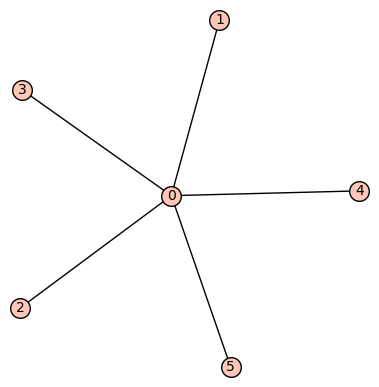

In [68]:
from sage.graphs.trees import TreeIterator
drevo = []
for G in TreeIterator(6):
    if G.is_connected():
        if len(G.cycle_basis('vertex')) == 0:
            drevo.append(G)
            G.show()

In [1]:
def AZIvrednost(graf, alpha): #Izračun AZI vrednost za nek graf, len(graf[u]) nam da dolžino seznama sosedovza vozlišče u, torej je to stopnja vozlišča u
    vsota = 0
    for u in graf:
        for v in graf[u]:
            vsota = vsota + ((len(graf[u]) *len(graf[v]))/(len(graf[u]) + len(graf[v]) - 2))^alpha
    return vsota/2

In [70]:
alpha = -3
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alpha)
    AZI_vred[a] = (G)

64/25


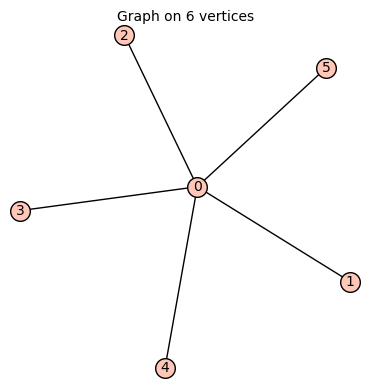

In [71]:

print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

5/8


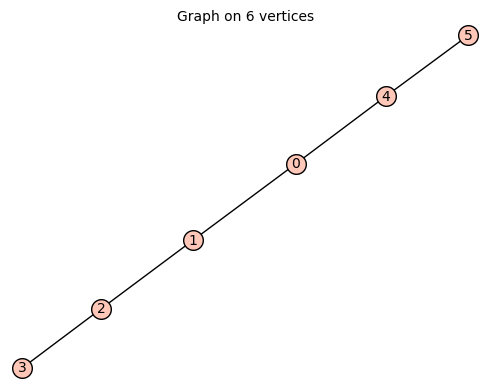

In [72]:

print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [73]:
alpha = -2
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alpha)
    AZI_vred[a] = (G)

16/5


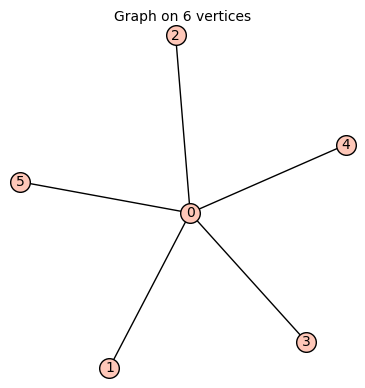

In [74]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

5/4


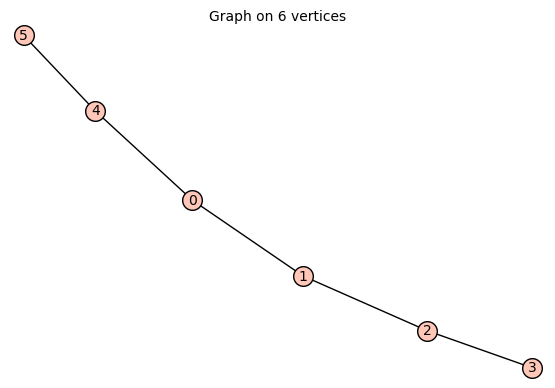

In [75]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [76]:
alpha = -1
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alpha)
    AZI_vred[a] = (G)

4


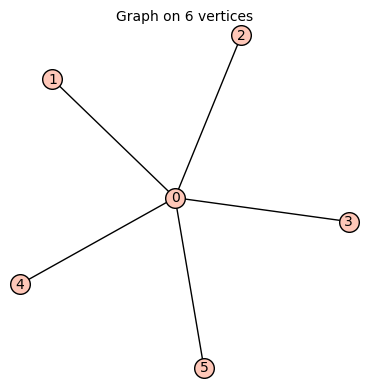

In [77]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

5/2


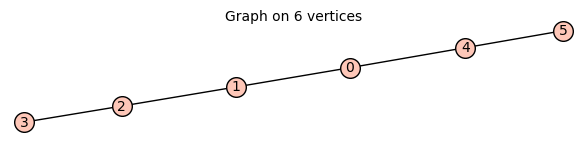

In [78]:

print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [79]:
alpha = 0
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alpha)
    AZI_vred[a] = (G)

5


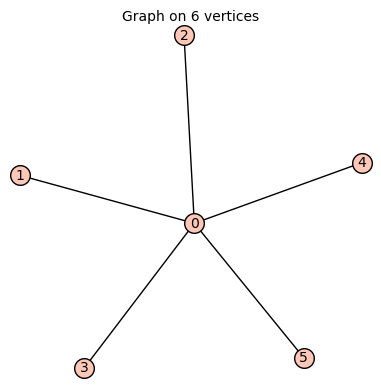

In [80]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

5


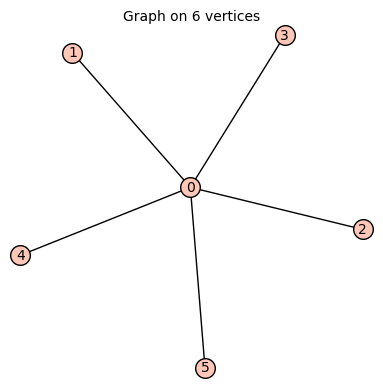

In [81]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [82]:
alpha = 8
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alpha)
    AZI_vred[a] = (G)

1280


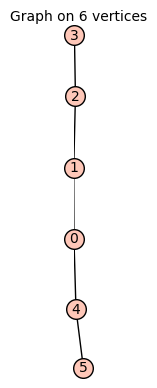

In [83]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

1953125/65536


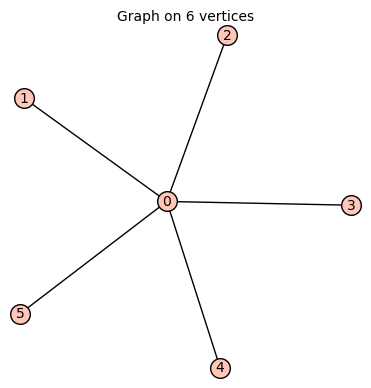

In [84]:

print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [85]:
alpha = 2
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alpha)
    AZI_vred[a] = (G)

20


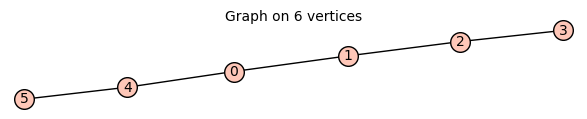

In [86]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

125/16


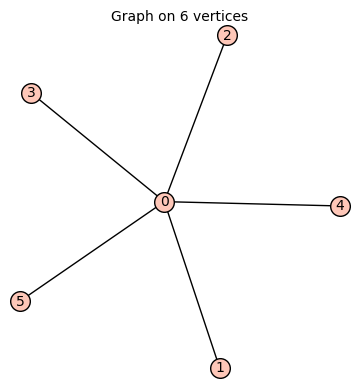

In [87]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [88]:
alpha = 3
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alpha)
    AZI_vred[a] = (G)

40


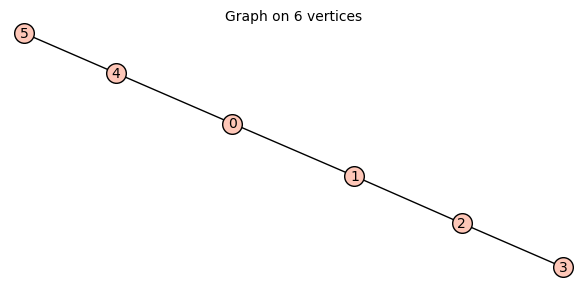

In [89]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

625/64


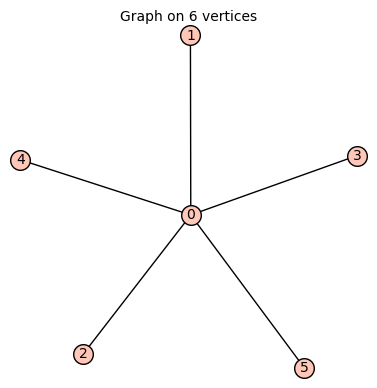

In [90]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

Če primerjamo različne alfa lahko opazimo najprej, da pri alfa = 0 ima graf maksimalno in minimalno AZI vrednost pri istem grafu. Zanimivo je to, da pri alfa z negativnimi vrednostmi ima zvezda maksimalno AZI vrednost, kar je obratno od alfa s pozitivnimi vrednostmi. Opazimo tudi to, da naprimer en graf, ki ima maksimalno AZI vrednost npr pri alfa = -1, isti graf ima minimalno AZI vrednost pri alfa = 1 in tisti graf ki ima pri alfa = -1 minimalno AZI vrednost ima pri alfa = 1 maksimalno AZI vrednost.

In [91]:

def generiranje_dreves(n):
    A = graphs.RandomTree(n)
    return A


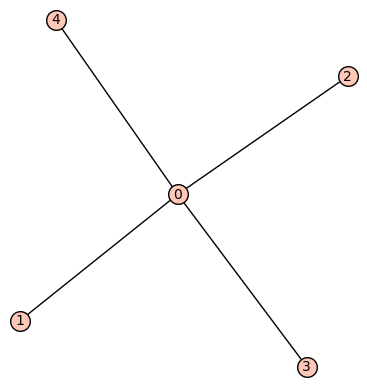

In [92]:

test = Graph({0: [1, 2, 3, 4]})
test.show()

In [93]:
choice(range(6))

1

In [94]:
from random import choice
def AZI_max(graf, n=100, tol=10^-9, i=0, alpha=3):
    najboljsa = trenutna = AZIvrednost(graf, alpha)
    najboljsi_graf = graf
    for j in range(n):
        T = n/(j+1)
        e = graf.random_edge(labels=False)
        i += 1
        K = Graph(graf)
        if i > n:
            return(AZIvrednost(K, alpha))
        K.delete_edge(e)
        if K.is_connected():
            e = K.complement().random_edge()
        else:
            A, B = K.connected_components()
            e = (choice(A), choice(B))
        K.add_edge(e)
        a = AZIvrednost(K, alpha)
        if a > najboljsa:
            najboljsi_graf = K
            najboljsa = a
        if a > trenutna or exp((trenutna - a) / T) > random():
            graf = K
            trenutna = a
    najboljsi_graf.show()
    return (najboljsi_graf, najboljsa)

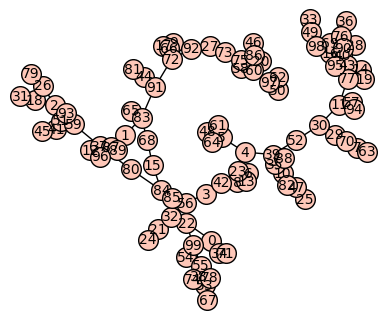

(Graph on 100 vertices, 46052604311303188647463921/18280792200314880000000000)

In [97]:
B = generiranje_dreves(100)
AZI_max(B,10000, alpha = -10)

In [0]:
from random import choice
def AZI_min(graf, n=100, tol=10^-9, i=0, alpha=3):
    najboljsa = trenutna = AZIvrednost(graf, alpha)
    najboljsi_graf = graf
    for j in range(n):
        T = n/(j+1)
        e = graf.random_edge(labels=False)
        i += 1
        K = Graph(graf)
        if i > n:
            return(AZIvrednost(K, alpha))
        K.delete_edge(e)
        if K.is_connected():
            e = K.complement().random_edge()
        else:
            A, B = K.connected_components()
            e = (choice(A), choice(B))
        K.add_edge(e)
        a = AZIvrednost(K, alpha)
        if a < najboljsa:
            najboljsi_graf = K
            najboljsa = a
        if a < trenutna or exp((trenutna - a) / T) > random():
            graf = K
            trenutna = a
    najboljsi_graf.show()
    return (najboljsi_graf, najboljsa)

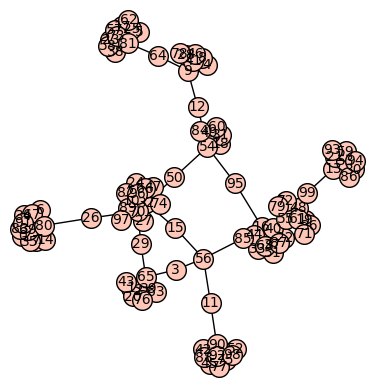

(Graph on 100 vertices,
 2615117517349564772614520758236679811/114752696193360080142336000000000)

In [98]:
B = generiranje_dreves(100)
AZI_min(B,10000, alpha = 10)

In [2]:
import json

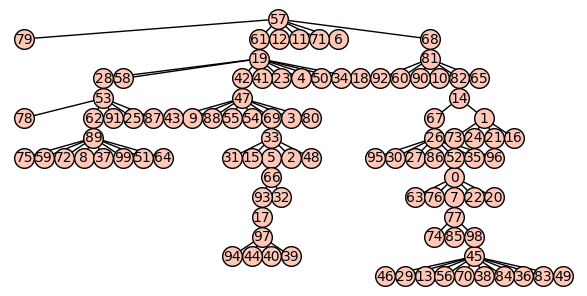

In [5]:
with open("min2_100_99.json") as f:
    Gmin_p2 = Graph(str(json.load(f)), loops=False, multiedges=False)
Gmin_p2.plot(layout="tree")

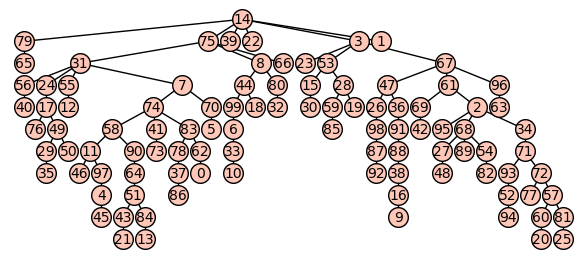

In [6]:
with open("max2_100_99.json") as f:
    Gmax_p2 = Graph(str(json.load(f)), loops=False, multiedges=False)
Gmax_p2.plot(layout="tree")

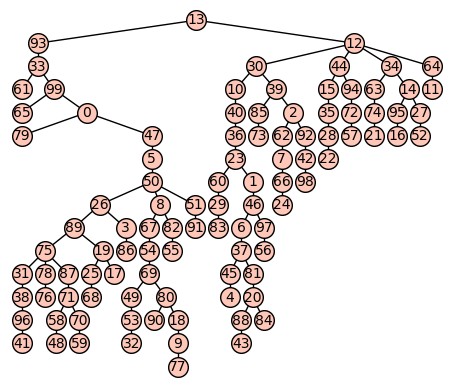

In [7]:
with open("min-2_100_99.json") as f:
    Gmin_m2 = Graph(str(json.load(f)), loops=False, multiedges=False)
Gmin_m2.plot(layout="tree")

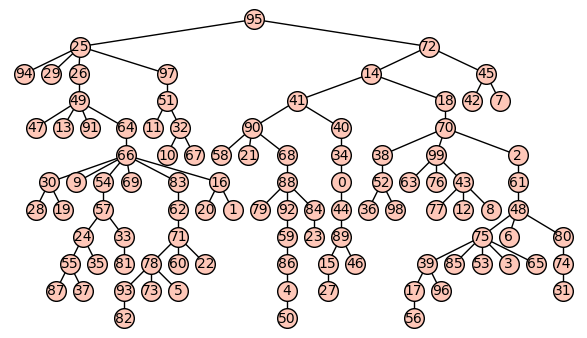

In [8]:
with open("max-2_100_99.json") as f:
    Gmax_m2 = Graph(str(json.load(f)), loops=False, multiedges=False)
Gmax_m2.plot(layout="tree")

In [7]:
Gmin_m2.is_isomorphic(Gmax_p2)

False

In [8]:
Gmin_p2.is_isomorphic(Gmax_m2)

False

In [11]:
[[N(AZIvrednost(G, alpha)) for G in (Gmin_m2, Gmax_m2, Gmin_p2, Gmax_p2)] for alpha in (-2, 2)]

[[59.6597812150572, 35.4540430524061], [211.009751669186, 342.267661564626]]

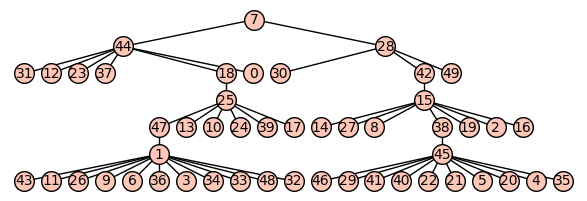

In [4]:
with open("min2_50_49.json") as f:
    G50min_p2 = Graph(str(json.load(f)), loops=False, multiedges=False)
G50min_p2.plot(layout="tree")

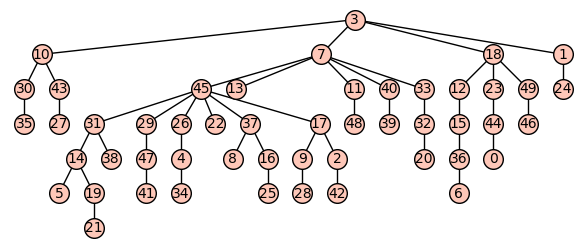

In [5]:
with open("max2_50_49.json") as f:
    G50max_p2 = Graph(str(json.load(f)), loops=False, multiedges=False)
G50max_p2.plot(layout="tree")

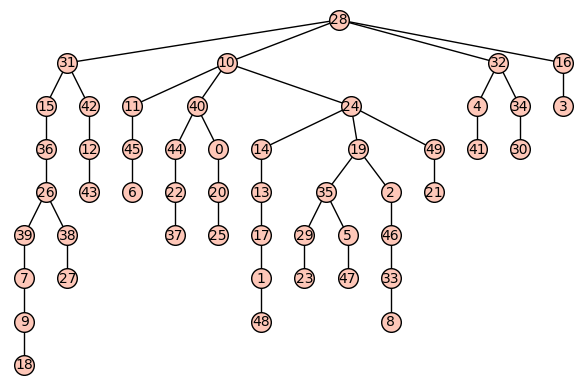

In [6]:
with open("min-2_50_49.json") as f:
    G50min_m2 = Graph(str(json.load(f)), loops=False, multiedges=False)
G50min_m2.plot(layout="tree")

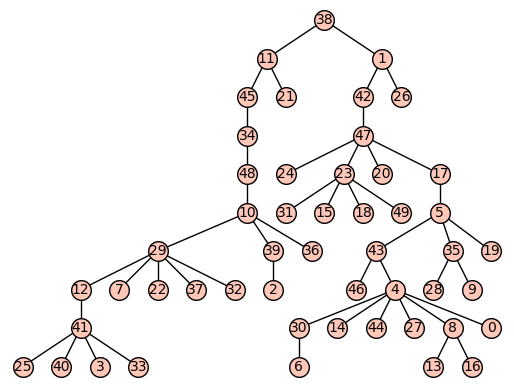

In [7]:
with open("max-2_50_49.json") as f:
    G50max_m2 = Graph(str(json.load(f)), loops=False, multiedges=False)
G50max_m2.plot(layout="tree")

In [8]:
[[N(AZIvrednost(G, alpha)) for G in (G50min_m2, G50max_m2, G50min_p2, G50max_p2)] for alpha in (-2, 2)]

[[11.6732253086420, 21.2036471655329, 33.0732071409831, 12.8893179957168],
 [210.324722222222, 154.201875000000, 90.1943104514533, 215.735109618916]]

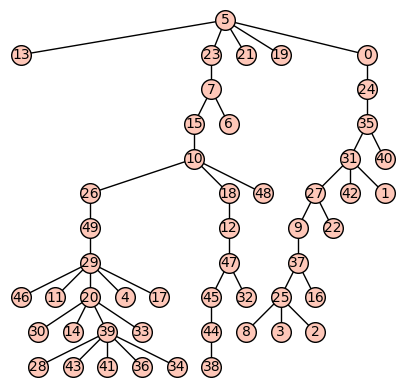

In [9]:
with open("min0.3_50_49.json") as f:
    G50min_pd3 = Graph(str(json.load(f)), loops=False, multiedges=False)
G50min_pd3.plot(layout="tree")

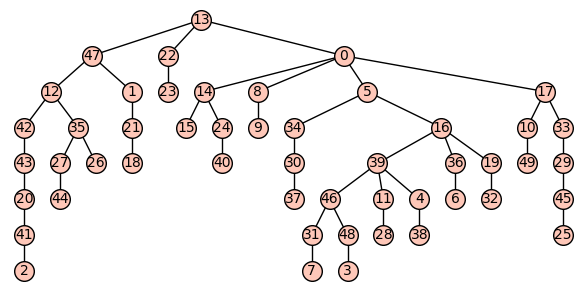

In [10]:
with open("max0.3_50_49.json") as f:
    G50max_pd3 = Graph(str(json.load(f)), loops=False, multiedges=False)
G50max_pd3.plot(layout="tree")

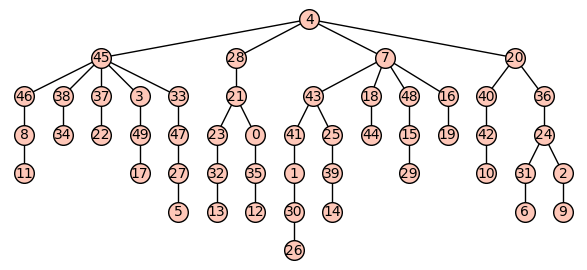

In [11]:
with open("min-0.3_50_49.json") as f:
    G50min_md3 = Graph(str(json.load(f)), loops=False, multiedges=False)
G50min_md3.plot(layout="tree")

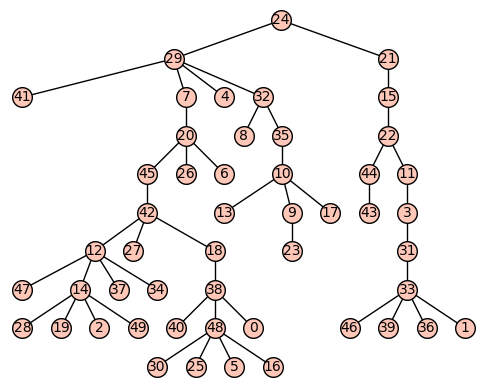

In [12]:
with open("max-0.3_50_49.json") as f:
    G50max_md3 = Graph(str(json.load(f)), loops=False, multiedges=False)
G50max_md3.plot(layout="tree")

In [13]:
[[N(AZIvrednost(G, alpha)) for G in (G50min_md3, G50max_md3, G50min_pd3, G50max_pd3)] for alpha in (-.3, .3)]

[[39.5290847575601, 42.3807245181037, 42.3849573980306, 39.4981904092131],
 [60.7788154808182, 57.0244678936907, 57.0407069873642, 60.8456758593992]]